# Introduction to Neural Networks using Keras

In this computer exercise we will follow some examples of neural networks implementations based on the use of Keras. The examples proposed in this exercise are very high level and easy to understand. Most of them are based on the original tutorials from Google that you can, alternatively, follow whenever you find some details in this exercise that are not clear. Together with the examples, we propose some questions and simple modifications of the models or examples that the student have to implement and present the results obtained or answer to the questions. These exercises pretend to give a general view of the environment and to give some solid grounds for examples that we have already analyzed in the classroom. Although Keras is a very high level language it implements many variations of well known models and has good flexibility for controlling the architecture of the network, the parameters and the training process. We encourage the student to follow the tutorial in https://www.tensorflow.org/guide/keras to obtain a quick view over the possibilities of Keras.

## A Hello-World example: Handwritten character classification using linear regression with Keras

In this exercise we will develop a linear classifier using Keras that will try to classify input images of handwritten digits. The example is based on MNIST database, a database that is considered as the Hello World database for Machine Learning. The database was originally created by Yan LeCun and the details of its structure are explained at http://yann.lecun.com/exdb/mnist/

Essentially, the database contains 70.000 examples of handwritten digits with its labels. Each image is a 256 gray level image with a 28x28 resolution. In this experiment we will use 60.000 images as the training set and 10.000 images for the testing set.

We can read the data using tensorflow and keras libraries that include this data as examples.

The following section of code imports tensorflow, keras and other help libraries. If your version is below 1.9.0 you should update your tensorflow library. Then, it reads the training and testing data from MNIST libraries and finally normalizes the data to unity (usually data normalization helps to accelerate training). In this case the normalization is between [0,1] but it also could be centered between [-1, 1].



In [1]:
# Defining libraries

#import tensorflow.compat.v1 as tf
#tf.disable_v2_behavior()

from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras.optimizers import SGD, Adam, RMSprop

# Other helper libraries

import numpy as np
import matplotlib.pyplot as plt

# Reading data from MNIST libraries

from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

(train_images,train_labels),(test_images,test_labels) = mnist.load_data()

# We also normalize the images

train_images = train_images / 255.0
test_images = test_images / 255.0

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


The next portion of code is used to verify the size train_images tensor which is composed by 60000 images with resolution 28x28. It also shows one of the images (index 100) in gray level scale and prints the label of that image.

(60000, 28, 28)
2


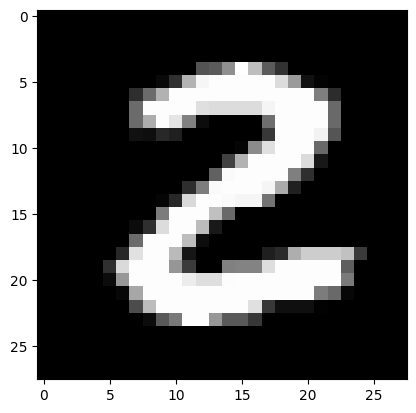

In [2]:
# We can verify the size of the training samples (60000)
#and the size of the images (28 x 28)

print(train_images.shape)

# Once images have been load we can vverify one of the training examples
# and its class

plt.figure()
plt.imshow(train_images[25],cmap='gray')

print(train_labels[25])


**Question 1. As an exercise you can verify the size of the test_images and its labels. Write a portion of code printing the number of test images and its resolution and represent the test image with index 500 verifying that the label assigned it is correct.**

(10000, 28, 28)
3


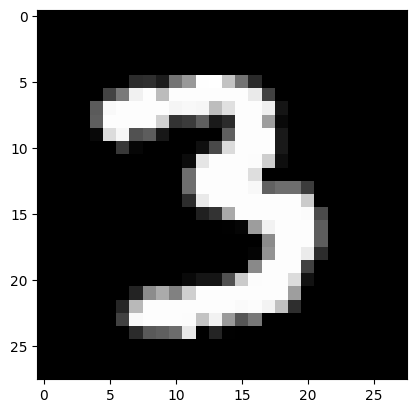

In [3]:
print(test_images.shape)
#image at 500 in grayscale

plt.figure()
plt.imshow(test_images[500], cmap='gray')

print(test_labels[500])

Finally, another usefull section of code to analyse the training database is to represent a tile of 5x5 images with their associated labels. The 25 images are sampled randomly among the training samples using the array rand_sampling. The following figure shows and example of the handwritten digits and their labels that have been selected.

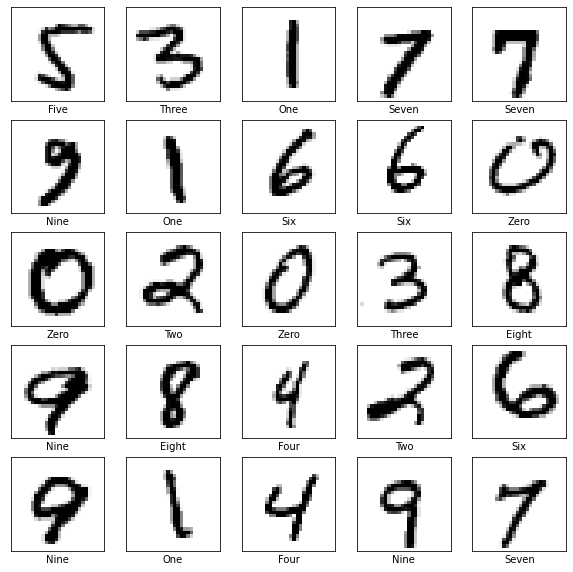

In [ ]:
# %%
# Representing some of the training examples with their labels

class_names = ['Zero', 'One', 'Two', 'Three', 'Four',
               'Five', 'Six', 'Seven', 'Eight', 'Nine']

# Representing and array of random samples of images and labels
# in the MNIST training database

rand_sampling = np.random.randint(60000,size=25)

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[rand_sampling[i]], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[rand_sampling[i]]])


## Defining the model and training the network

The definition of a network in Keras is very simple, the idea is to assemble different layers to build models. The most common type of model is a stack of layers. Layers can be sequentially added to the model using the add function. The following section of code defines a first layer of 64 neurons with relu output activations connected to a second layer of the same characteristics. The second layer is finally connected to 10 output neurons that produce a softmax activation. The model is defining a three layer perceptron with 64, 64 and 10 neurons in the different layers.




```
# DO NOT RUN THIS SECTION IS AN EXAMPLE OF NETWORK DEFINITION CODE
# Defining & building a model of linear regression (one layer of 10 neurons)


model = models.Sequential()
# Adds a densely-connected layer with 64 units to the model:
model.add(layers.Dense(64, activation='relu', input_shape=(28*28,)))
# Adds a densely-connected layer with 128 units to the model:
model.add(layers.Dense(64, activation='relu'))
# Add a softmax layer with 10 output units
model.add(layers.Dense(10,activation='softmax'))'''
```



In [4]:
# Defining & building a model of linear regression (one layer of 10 neurons)

model = models.Sequential()

model.add(layers.Flatten())
model.add(layers.Dense(10,activation='softmax',input_shape=(28*28,)))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


The first layer is not a real neuron layer but the definition of the inputs to the networks. The inputs are fully (Densely) connected to 10 neurons with a softmax activation function.

## Training the Model

Once the model has been designed the training process is usually divided into 2 steps. The first step is Setting-Up the training, using a method called Compile.

The keras.model.compile has three important arguments:

**optimizer**: Defines the training procedure that can be such as AdamOptimizer, RMSPropOptimizer, GradientDescentOptimizer.

**loss**: Defines the function to minimize in the optimization process. It can be mse (mean square error), categorical_crossentropy, binary_crossentropy, etc.

**metrics**: This argument is used to define the metrics that will be used to monitor the training.

In our example, the model is compiled using the following code:


In [5]:
model.compile(optimizer='rmsprop',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

Finally, the training is performed using the keras.model.fit method that defines the training examples for the input, the labels of the outputs and the number of epochs that will be used for fitting the model. The code in our example is:

In [6]:
# Training the model

model.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7671 - loss: 0.9415
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9054 - loss: 0.3399
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9139 - loss: 0.3081
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9170 - loss: 0.2943
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9184 - loss: 0.2899


Optionally, in the fitting process it is possible to define the batch_size and the validation_data that can be used to test the performance of the network with some examples not used in the training process.

If we run the example code up to this line we should be able to see how the training is progressing through the different epochs. The results should be similar to the following figure, where we list the time required for executing each epoch, the loss after training and the accuracy, where we see that their improvement with extra training is collapsing in the last epochs. Be careful with these results because the loss and the accuracy are computed for the training set and the system could be overfitting the data. In the next section we will see how to analyze the performance of the network using the test set. However, lets evaluate if learning in the training set could be improved using alternative optimizers such as Gradient Descent.


**Question 2. Try to change the Optimizer Method to SGD and compare the training evolution of the 5 epochs with the AdamOptimizer. (use help to introduce the learning rate as input parameter in the SGD Optimizer). Answer the following questions**

- Use different learning rates values to find your final selection. What it is your best learning rate?**

Answer:

SGD: best learning_rate = 0.1, with test accuracy of 0.9166.

Adam: The best learning_rate = 0.001 with test accuracy 0.9236.

RMSprop: The best learning_rate = 0.001 with test accuracy 0.9247.

- Can you improve the results obtained with AdamOptimizer forcing a learning during more epochs? **

Answer:

adam_model_lr_0.001 Test accuracy: 0.9276
adam_model_lr_0.01 Test accuracy: 0.9226

Increasing the epochs from 5 to 20, we do not see a significant increase in test accuracy.

- Repeat the previous 2 questions for the RMSPropOptimizer.**

Answer:

RMSprop: The best learning_rate = 0.001 with test accuracy 0.9295 with 20 epoch.

rmsprop_model_lr_0.001 Test accuracy: 0.9295
rmsprop_model_lr_0.01 Test accuracy: 0.9210

Increasing the epochs from 5 to 20, we do not see a significant increase in test accuracyfor RMSprop either.

- Which optimizer is prefered? **

Answer:

Based on the results obtained from the test sets, best optimizer is RMSprop.

In [9]:
# Define learning rates to test
learning_rates = {
    "SGD": [0.001, 0.01, 0.1],
    "Adam": [0.001, 0.01],
    "RMSprop": [0.001, 0.01]
}

# Function to create and compile model
def create_model(optimizer):
    model = models.Sequential()
    model.add(layers.Flatten())
    model.add(layers.Dense(10, activation='softmax', input_shape=(28*28,)))
    model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# Dictionary to store models and their histories
models_dict = {}
histories = {}

# sgd
for lr in learning_rates["SGD"]:
    sgd_model = create_model(SGD(learning_rate=lr))
    model_name = f'sgd_model_lr_{lr}'
    print(f"Training {model_name}")
    histories[model_name] = sgd_model.fit(train_images, train_labels, epochs=5, batch_size=128, validation_data=(test_images, test_labels))
    models_dict[model_name] = sgd_model

# adam
for lr in learning_rates["Adam"]:
    adam_model = create_model(Adam(learning_rate=lr))
    model_name = f'adam_model_lr_{lr}'
    print(f"Training {model_name}")
    histories[model_name] = adam_model.fit(train_images, train_labels, epochs=5, batch_size=128, validation_data=(test_images, test_labels))
    models_dict[model_name] = adam_model

# rmsprop
for lr in learning_rates["RMSprop"]:
    rmsprop_model = create_model(RMSprop(learning_rate=lr))
    model_name = f'rmsprop_model_lr_{lr}'
    print(f"Training {model_name}")
    histories[model_name] = rmsprop_model.fit(train_images, train_labels, epochs=5, batch_size=128, validation_data=(test_images, test_labels))
    models_dict[model_name] = rmsprop_model



Training sgd_model_lr_0.001
Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.2060 - loss: 2.2411 - val_accuracy: 0.4561 - val_loss: 1.9112
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5062 - loss: 1.8381 - val_accuracy: 0.6483 - val_loss: 1.6045
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6658 - loss: 1.5589 - val_accuracy: 0.7283 - val_loss: 1.3873
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7323 - loss: 1.3646 - val_accuracy: 0.7688 - val_loss: 1.2297
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7672 - loss: 1.2205 - val_accuracy: 0.7900 - val_loss: 1.1121
Training sgd_model_lr_0.01
Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.5091 - loss: 1.7050 - val_accuracy: 0.8312 - val_loss: 0.8189
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8308 - loss: 0.7737 - val_accuracy: 0.8615 - val_loss: 0.6099
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - acc

## Evaluating the results

Testing the fitted model with test data may be done using the evaluate method. In this code we executed the model for all the test data samples and labels and obtain the final accuracy. If the final accuracy is close to the accuracy obtained with the training database it means that the network has generalized well and that the results are satisfactory.

In [10]:

# Evaluate each model on the test set and print the accuracy
for model_name, model in models_dict.items():
    test_loss, test_acc = model.evaluate(test_images, test_labels)
    print(f"{model_name} Test accuracy: {test_acc}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7625 - loss: 1.1767
sgd_model_lr_0.001 Test accuracy: 0.7900000214576721
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8664 - loss: 0.5079
sgd_model_lr_0.01 Test accuracy: 0.8855000138282776
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9054 - loss: 0.3419
sgd_model_lr_0.1 Test accuracy: 0.9165999889373779
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9129 - loss: 0.3156
adam_model_lr_0.001 Test accuracy: 0.9236000180244446
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9108 - loss: 0.3367
adam_model_lr_0.01 Test accuracy: 0.9204999804496765
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9125 - loss: 0.3136
rmsprop_model_lr_0.001 Test accuracy: 0.9247000217437744
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8990 - loss: 0.3811
rmsprop_model_lr_0.01 Test accuracy: 0.9110000133514404


In [11]:
#adam with more epochs----

# adam
for lr in learning_rates["Adam"]:
    adam_model = create_model(Adam(learning_rate=lr))
    model_name = f'adam_model_lr_{lr}'
    print(f"Training {model_name}")
    histories[model_name] = adam_model.fit(train_images, train_labels, epochs=20, batch_size=128, validation_data=(test_images, test_labels))
    models_dict[model_name] = adam_model

Training adam_model_lr_0.001
Epoch 1/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7156 - loss: 1.0773 - val_accuracy: 0.9007 - val_loss: 0.3835
Epoch 2/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8985 - loss: 0.3811 - val_accuracy: 0.9124 - val_loss: 0.3199
Epoch 3/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9121 - loss: 0.3212 - val_accuracy: 0.9171 - val_loss: 0.2979
Epoch 4/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9169 - loss: 0.3033 - val_accuracy: 0.9204 - val_loss: 0.2866
Epoch 5/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9201 - loss: 0.2885 - val_accuracy: 0.9211 - val_loss: 0.2799
Epoch 6/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9243 - loss: 0.2751 - val_accuracy: 0.9231 - val_loss: 0.2725
Epoch 7/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9252 - loss: 0.2710 - val_accuracy: 0.9234 - val_loss: 0.2719
Epoch 8/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9243 - lo

In [13]:
#rmsprop with more epochs----

for lr in learning_rates["RMSprop"]:
    adam_model = create_model(Adam(learning_rate=lr))
    model_name = f'rmsprop_model_lr_{lr}'
    print(f"Training {model_name}")
    histories[model_name] = adam_model.fit(train_images, train_labels, epochs=20, batch_size=128, validation_data=(test_images, test_labels))
    models_dict[model_name] = adam_model

Training rmsprop_model_lr_0.001
Epoch 1/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7314 - loss: 1.0517 - val_accuracy: 0.9027 - val_loss: 0.3823
Epoch 2/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8990 - loss: 0.3794 - val_accuracy: 0.9138 - val_loss: 0.3212
Epoch 3/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9100 - loss: 0.3281 - val_accuracy: 0.9174 - val_loss: 0.2980
Epoch 4/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9166 - loss: 0.3021 - val_accuracy: 0.9207 - val_loss: 0.2857
Epoch 5/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9189 - loss: 0.2921 - val_accuracy: 0.9227 - val_loss: 0.2794
Epoch 6/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9208 - loss: 0.2838 - val_accuracy: 0.9240 - val_loss: 0.2751
Epoch 7/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9223 - loss: 0.2774 - val_accuracy: 0.9238 - val_loss: 0.2719
Epoch 8/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9250 -

In [14]:
# Evaluate each model on the test set and print the accuracy
for model_name, model in models_dict.items():
    test_loss, test_acc = model.evaluate(test_images, test_labels)
    print(f"{model_name} Test accuracy: {test_acc}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7625 - loss: 1.1767
sgd_model_lr_0.001 Test accuracy: 0.7900000214576721
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8664 - loss: 0.5079
sgd_model_lr_0.01 Test accuracy: 0.8855000138282776
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9054 - loss: 0.3419
sgd_model_lr_0.1 Test accuracy: 0.9165999889373779
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9169 - loss: 0.2979
adam_model_lr_0.001 Test accuracy: 0.9276000261306763
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9124 - loss: 0.3512
adam_model_lr_0.01 Test accuracy: 0.9225999712944031
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9186 - loss: 0.2968
rmsprop_model_lr_0.001 Test accuracy: 0.9294999837875366
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9126 - loss: 0.3572
rmsprop_model_lr_0.01 Test accuracy: 0.9210000038146973


**Question 3.**

- What is the test accuracy in the model trained with AdamOptimizer compared with the train accuracy?

Answer:

Training accuracy- learning rate 0.001 ----> accuracy: 0.9215

Test accuracy- learning rate 0.001 ----> accuracy: 0.9236

Training accuracy-learning rate 0.01 ----> accuracy 0.9247


Test accuracy- learning rate 0.01 ----> accuracy: 0.9205

- Do you think that the network has generalized well?

Answer:

Yes, the training and testing accuracies are consistent, so the model has generalized well.

- What does happen if instead of AdamOptimizer we use the SGD?

Answer:

The same phenomena is seen for SGD too.

Training sgd_model_lr_0.001 accuracy: 0.7672

sgd_model_lr_0.001 Test accuracy: 0.7900

Training sgd_model_lr_0.01 accuracy: 0.8753

sgd_model_lr_0.01 Test accuracy: 0.8855


Training sgd_model_lr_0.1 accuracy: 0.9117

sgd_model_lr_0.1 Test accuracy: 0.9166


## Making Predictions

Predictions are performed applying the predict method to the set of images to be tested

In [15]:
# Making Predictions

predictions = model.predict(test_images)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


The result predictions is a matrix with 1000 rows and 10 columns. Each row represent one of the 1000 testing images and contains the 10 values representing the probability of each character. For example, if we examine the prediction for test sample 25 we obtain the following vector prediction.

In [16]:
print(predictions[25])

[9.9999809e-01 2.5032064e-33 1.3341927e-11 3.1120613e-17 1.0694602e-11
 9.1211227e-10 1.8998880e-06 6.6312965e-18 1.1482308e-10 5.1658460e-15]


## Viewing Predictions

The vector represents the probability of the different digits. In this example, digit zero has a probability of 0.998 while the other digits have very low probabilities. Therefore, the final predicted digit would be, in this example, digit zero. We can verify that image 25 in the test set is a ‘zero’ just printing the label of this image. See the instructions to inspect predictions vector in the #Viewing predictions cell defined in the source code.

Another option to visually evaluate the predictions of our system is representing the character together wit a graphic of the probabilities. The following section of code defines 2 basic plotting functions that are used to produce the results depicted in the Figure.


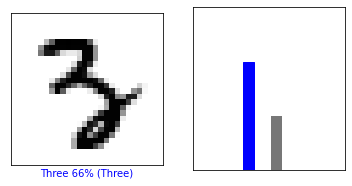

In [ ]:
# %% Graphical represntation of a single prediction

# Basic plotting functions definitions

def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

# %% Plotting
# Change variable -i- to select different indices in the test dataset
i = 87
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)



The final code cell permits to represent and array of random testing samples to evaluate the performance of the algorithm with different types of input samples. The code rearranges the previous graphic in a subplot matrix where the user can define the number of rows and columns.

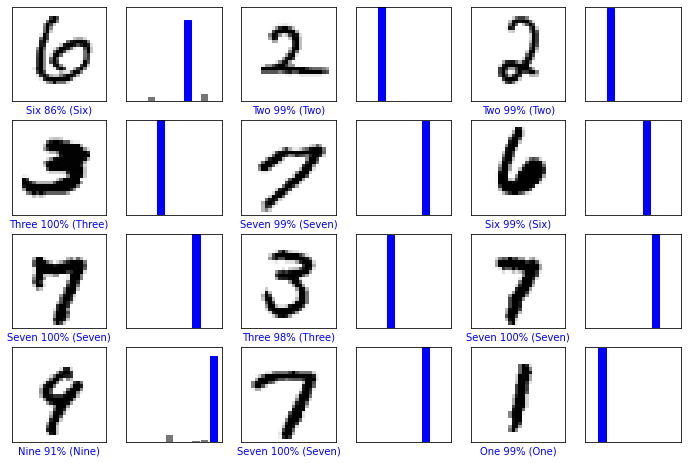

In [ ]:
# %% Plotting various samples

# Plot the first X test images, their predicted label, and the true label
# Color correct predictions in blue, incorrect predictions in red

rnd_testing = np.random.randint(10000,size=12)

num_rows = 4
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(rnd_testing[i], predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(rnd_testing[i], predictions, test_labels)




**Question 4.**

Change the model of your network to a 3 layer fully connected network. The first layer should have 128 neurons, the second layer 64 and the third layer 10 neurons. The last layer uses a softmax activation function but the 1st and 2nd layer can be ‘relu’ or ‘sigmoid’ (2 different models).

Define the models of the network and copy this part of the code below:

Train both models during 10 epochs and fill-in the following table


Method | Accuracy Training Dataset | Accuracy Testing Set
--- | --- | ---
Relu + Adam | 0.9935 | 0.9764
Relu + Gradient Descent | 0.9308 | 0.9331
Sigmoid + Adam | 0.9854 | 0.9741
Sigmoid + Gradient Descent | 0.7496 | 0.7696




In [17]:
from tensorflow.keras import models, layers
from tensorflow.keras.optimizers import Adam, SGD

def create_model(activation, optimizer):
    model = models.Sequential()
    model.add(layers.Flatten(input_shape=(28, 28)))
    model.add(layers.Dense(128, activation=activation))
    model.add(layers.Dense(64, activation=activation))
    model.add(layers.Dense(10, activation='softmax'))
    model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model


# Relu + Adam
relu_adam_model = create_model('relu', Adam())
history_relu_adam = relu_adam_model.fit(train_images, train_labels, epochs=10, batch_size=128, validation_data=(test_images, test_labels))
train_acc_relu_adam = history_relu_adam.history['accuracy'][-1]
test_loss, test_acc_relu_adam = relu_adam_model.evaluate(test_images, test_labels)

# Relu + SGD
relu_sgd_model = create_model('relu', SGD())
history_relu_sgd = relu_sgd_model.fit(train_images, train_labels, epochs=10, batch_size=128, validation_data=(test_images, test_labels))
train_acc_relu_sgd = history_relu_sgd.history['accuracy'][-1]
test_loss, test_acc_relu_sgd = relu_sgd_model.evaluate(test_images, test_labels)

# Sigmoid + Adam
sigmoid_adam_model = create_model('sigmoid', Adam())
history_sigmoid_adam = sigmoid_adam_model.fit(train_images, train_labels, epochs=10, batch_size=128, validation_data=(test_images, test_labels))
train_acc_sigmoid_adam = history_sigmoid_adam.history['accuracy'][-1]
test_loss, test_acc_sigmoid_adam = sigmoid_adam_model.evaluate(test_images, test_labels)

# Sigmoid + SGD
sigmoid_sgd_model = create_model('sigmoid', SGD())
history_sigmoid_sgd = sigmoid_sgd_model.fit(train_images, train_labels, epochs=10, batch_size=128, validation_data=(test_images, test_labels))
train_acc_sigmoid_sgd = history_sigmoid_sgd.history['accuracy'][-1]
test_loss, test_acc_sigmoid_sgd = sigmoid_sgd_model.evaluate(test_images, test_labels)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.8293 - loss: 0.6117 - val_accuracy: 0.9484 - val_loss: 0.1727
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9582 - loss: 0.1417 - val_accuracy: 0.9652 - val_loss: 0.1140
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9720 - loss: 0.0965 - val_accuracy: 0.9672 - val_loss: 0.0994
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9784 - loss: 0.0725 - val_accuracy: 0.9732 - val_loss: 0.0867
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9835 - loss: 0.0546 - val_accuracy: 0.9742 - val_loss: 0.0795
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9867 - loss: 0.0431 - val_accuracy: 0.9728 - val_loss: 0.0906
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9896 - loss: 0.0341 - val_accuracy: 0.9738 - val_loss: 0.0868
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9912 - loss: 0.0290 - val_accuracy: 0.

In [18]:
# Display results
print("\nMethod\t\t\tAccuracy Training Dataset\tAccuracy Testing Set")
print(f"Relu + Adam\t\t{train_acc_relu_adam:.4f}\t\t\t\t{test_acc_relu_adam:.4f}")
print(f"Relu + Gradient Descent\t{train_acc_relu_sgd:.4f}\t\t\t\t{test_acc_relu_sgd:.4f}")
print(f"Sigmoid + Adam\t\t{train_acc_sigmoid_adam:.4f}\t\t\t\t{test_acc_sigmoid_adam:.4f}")
print(f"Sigmoid + Gradient Descent\t{train_acc_sigmoid_sgd:.4f}\t\t\t\t{test_acc_sigmoid_sgd:.4f}")


Method			Accuracy Training Dataset	Accuracy Testing Set
Relu + Adam		0.9935				0.9764
Relu + Gradient Descent	0.9308				0.9331
Sigmoid + Adam		0.9854				0.9741
Sigmoid + Gradient Descent	0.7496				0.7696


## Fashion MNIST

It may be interesting to check if the network that we have created may produce good results with other types of databases. MNIST is a very popular database, that was created in the 90s to compare the performance of different machine learning algorithms. Today, it is easy to obtain good results to solve the problem of handwritten digit recognition using neural networks or other machine learning approaches.

An alternative to MNIST is Fashion MNIST which share the same structure and can be easily integrated in any program working with MNIST. Fashion MNIST also consist in a set of 60.000 training images with a resolution of 28x28 and 256 gray levels and 10.000 testing images. The difference between both databases is that Fashion MNIST includes images of different types of clothing. Instead of the digits number, now the labels are T-shirt/top, Trouser, Pullover, Dress, etc.

As the format of the images and the internal structure of the database is the same, it is easy to adapt our program to test its performance in Fashion MNIST. The only sentences that we have to change are the reading of the dataset and the definition of the classes names associated to the integer levels. That is:

In [19]:
# Defining libraries
from tensorflow.keras import layers
from tensorflow.keras import models

# Other helper libraries

import numpy as np
import matplotlib.pyplot as plt

# Reading data from MNIST libraries

from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical

(train_images,train_labels),(test_images,test_labels) = fashion_mnist.load_data()

# We also normalize the images

train_images = train_images / 255.0
test_images = test_images / 255.0


29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [20]:
# Naming the different classes with their labels

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


# %% Training the network cell

''' UNCOMMENT THIS SECTION TO IMPLEMENT A LINEAR REGRESSION
# Defining & building a model of linear regression (one layer of 10 neurons)

model = models.Sequential()
model.add(layers.Flatten(input_shape=(28,28)))
model.add(layers.Dense(10,activation='softmax'))

'''
# Defining & building a model of 2 hidden layers and an ouput

model = models.Sequential()
model.add(layers.Flatten())
model.add(layers.Dense(128,activation='relu'))
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(10,activation='softmax'))


In [21]:
# Compiling the model

model.compile(optimizer='rmsprop',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Training the model

model.fit(train_images, train_labels, epochs=20)

# Evaluating the results

test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc)

# Making Predictions

predictions = model.predict(test_images)


Epoch 1/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7696 - loss: 0.6438
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8635 - loss: 0.3782
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8762 - loss: 0.3461
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8846 - loss: 0.3282
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8854 - loss: 0.3289
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.8910 - loss: 0.3139
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8902 - loss: 0.3144
Epoch 8/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8931 - loss: 0.3050
Epoch 9/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8963 - loss: 0.2987
Epoch 10/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8980 - loss: 0.2901
Epoch 11/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8998 - loss: 0.2944
Epoch 12/20
1875/1875 ━━━━━━━━

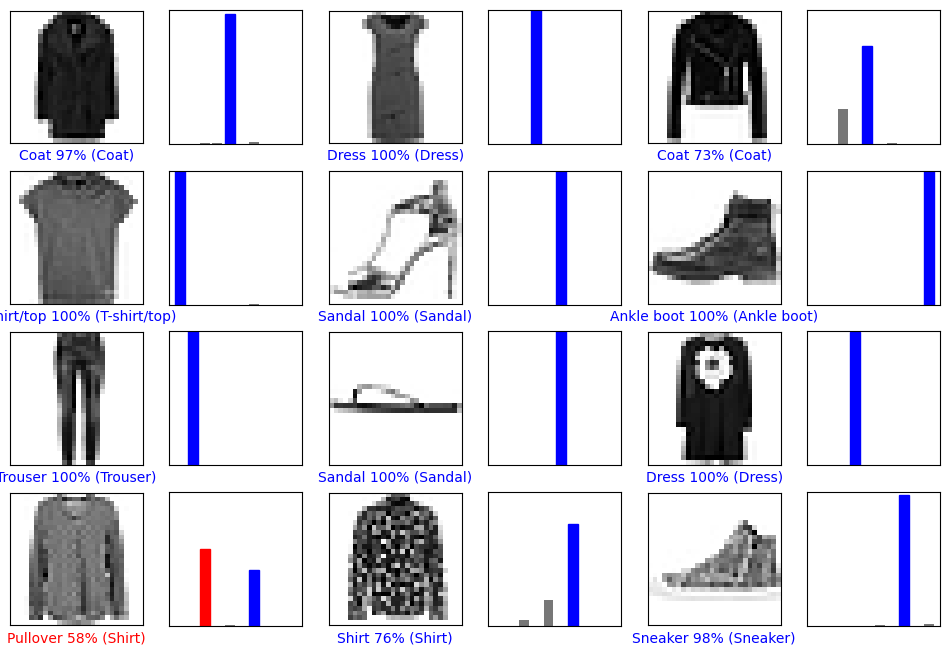

In [22]:

# %% Graphical represntation of a single prediction

# Basic plotting functions definitions

def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

# %% Plotting various samples

# Plot the first X test images, their predicted label, and the true label
# Color correct predictions in blue, incorrect predictions in red

rnd_testing = np.random.randint(10000,size=12)

num_rows = 4
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(rnd_testing[i], predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(rnd_testing[i], predictions, test_labels)




**Question 5.**

In this part of the exercise we will try to find a configuration of a 3 layer fully connected perceptron offering the better achievable accuracy for the test dataset. To do that we propose to select the activation functions and the learning method that produced best results in Question 5 and try to find a suitable architecture (number of neurons per layer) to maximize the accuracy in the test set. Possibly, as the number of parameters in fully connected networks increases you also should train your network during more epochs. Fill in the following table:

NEURONS LAYER 1| data
---|---
NEURONS LAYER 2| 128
NEURONS LAYER 3|10
ACTIVATIONS LAYERS 1+2|sigmoid
ACCURACY TRAINING SET|0.9147
ACCURACY TEST SET|0.8854


In [31]:
#3-layer fully connected model with customizable neurons
def create_model(neurons_layer2, activation):
    model = models.Sequential()
    model.add(layers.Flatten(input_shape=(28, 28)))
    model.add(layers.Dense(neurons_layer2, activation=activation))
    model.add(layers.Dense(10, activation='softmax'))
    model.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model


neurons_layer2 = 128
activation = 'sigmoid'

model = create_model(neurons_layer2, activation)

# Train model for 20 epochs (you can increase epochs as needed)
history = model.fit(train_images, train_labels, epochs=20, batch_size=128, validation_data=(test_images, test_labels))

#accuracy
train_acc = history.history['accuracy'][-1]
test_loss, test_acc = model.evaluate(test_images, test_labels)

#result
print(f"Neurons Layer 2: {neurons_layer2}")
print(f"Activation: {activation}")
print(f"Training Accuracy: {train_acc:.4f}")
print(f"Test Accuracy: {test_acc:.4f}")


/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.6899 - loss: 1.0083 - val_accuracy: 0.8199 - val_loss: 0.5069
Epoch 2/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8398 - loss: 0.4637 - val_accuracy: 0.8431 - val_loss: 0.4461
Epoch 3/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8574 - loss: 0.4025 - val_accuracy: 0.8520 - val_loss: 0.4163
Epoch 4/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8650 - loss: 0.3768 - val_accuracy: 0.8546 - val_loss: 0.4054
Epoch 5/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8750 - loss: 0.3511 - val_accuracy: 0.8629 - val_loss: 0.3882
Epoch 6/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8752 - loss: 0.3475 - val_accuracy: 0.8623 - val_loss: 0.3839
Epoch 7/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8815 - loss: 0.3293 - val_accuracy: 0.8682 - val_loss: 0.3681
Epoch 8/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8870 - loss: 0.3173 - val_accuracy: 0.

## Convolutional Neural Networks in Keras

One interesting strategy is to extend the models and include Convolutional Neural Network (CNN) architectures that usually will improve the predictions. Keras gives a lot of flexibility to define different models combining convolutional layers, pooling layers, dropouts, regularizations, etc. In the following section of code, we can see and example of a CNN architecture applied to our MNIST problem.

In this case, we are defining a network with a first 2D convolutional layer with a convolutional kernel of 5x5 and 16 feature map, with stride 1, without padding and an activation of relu. This layer is connected to another layer with 16 features, 3x3 kernel and the outputs are passed through a MaxPool layer with a 2x2 stride. It is easy to see that the construction of the code is almost straightforward and that any structure can easily be defined after sequencing the layers.  


For working with the system, the structure of the data has to be redefined to specifically indicate the number of channels in the input. With that purpose, train and test images are reshaped to have a dimension of (60000,28,28,1) and (10000,28,28,1). The last component indicates that the images are in gray level and that the input has a single channel. If images were in color the last component should be 3.
The fitting process (training) and the prediction have to work with the extended versions of the datasets.


In [35]:
train_images_ext = train_images.reshape(train_images.shape[0],28,28,1)
test_images_ext = test_images.reshape(test_images.shape[0],28,28,1)

#We also normilize the images
train_images_ext = train_images_ext / 255.0
test_images_ext = test_images_ext / 255.0
test_images_ext.shape

(10000, 28, 28, 1)

In [38]:
# Defining a model with 2D convolutional neural networks

model = models.Sequential()
model.add(layers.Conv2D(32,(3,3),
                              strides=(1,1),padding='valid',
                              data_format='channels_last', activation = 'relu'))
model.add(layers.Conv2D(64,(3,3),
                              strides=(1,1),padding='valid',
                              data_format='channels_last', activation = 'relu'))
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.Conv2D(64,(3,3),
                              strides=(1,1),padding='valid',
                              data_format='channels_last', activation = 'relu'))
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.Conv2D(128,(3,3),
                              strides=(1,1),padding='valid',
                              data_format='channels_last', activation = 'relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64,activation='relu'))
#model.add(layers.Dropout(0.10))
model.add(layers.Dense(10,activation='softmax'))
#
# Compiling the model

model.compile(optimizer='rmsprop',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Training the model
train_labels = train_labels.reshape(train_labels.shape[0],1)

model.fit(train_images_ext, train_labels, batch_size = 128, epochs=20)

# Evaluating the results

test_loss, test_acc = model.evaluate(test_images_ext, test_labels)
print('Test accuracy:', test_acc)


Epoch 1/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.0976 - loss: 2.3028
Epoch 2/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.1000 - loss: 2.3028
Epoch 3/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.0987 - loss: 2.3027
Epoch 4/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.0973 - loss: 2.3027
Epoch 5/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.0992 - loss: 2.3027
Epoch 6/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.0979 - loss: 2.3027
Epoch 7/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.0977 - loss: 2.3027
Epoch 8/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.1002 - loss: 2.3026
Epoch 9/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.0988 - loss: 2.3027
Epoch 10/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.1000 - loss: 2.3027
Epoch 11/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.0997 - loss: 2.3027
Epoch 12/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step

**Question 6**

- What is the final accuracy that you have obtained with the training set?

Answer: accuracy: 0.0969


- What is the final accuracy that you have obtained with the testing set?

Answer: Test accuracy: 0.1000


